<a href="https://colab.research.google.com/github/raknampuna/csci-82_Fall2020/blob/master/HW1_CSCI_E_82_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <center>CSCI E-82</center>
## <center>HW 1  Dimensionality Reduction</center>
### <center>Due: Monday Sept 14, 2020 11:59pm EST</center>

### Note that this is an individual homework to be completed without collaborations except through Piazza.  



### Your name: Anup Mankar

In [ ]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import decomposition, preprocessing
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from matplotlib.colors import ListedColormap
import umap #pip install umap-learn

dark2_colors = ['#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e','#e6ab02','#a6761d','#666666']
dark2_cmap = ListedColormap(dark2_colors)
shade_black = '#262626'

## Problem 1 Python Linear Algebra  (5 points total)

$$\mathbf{X} = \left[\begin{array}
{rrr}
1 & 2 & 3 \\
4 & 5 & 7 \\
8 & 10 & 12
\end{array}\right]
$$

$$\mathbf{Y} = \left[\begin{array}
{rrr}
1 & 2 & 1 \\
0 & 0 & 0 \\
-1 & -2 & -1  
\end{array}\right]
$$

### Problem 1a (3 points)
Compute YX<sup>T</sup> using any python approach.  We recommend np.array math, but the choice is yours.


In [ ]:
X = np.array([[1,2,3],[4,5,7],[8,10,12]])
Y = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])

In [ ]:
X_t = np.transpose(X)
X_t

array([[ 1,  4,  8],
       [ 2,  5, 10],
       [ 3,  7, 12]])

In [ ]:
np.matmul(Y,X_t)

array([[  8,  21,  40],
       [  0,   0,   0],
       [ -8, -21, -40]])

### Problem 1b (2 points)

Compute X<sup>-1</sup>, the inverse of X.  Again, use a python library for this.  You don't need to do anything manually.

In [ ]:
np.linalg.inv(X)

array([[-1.66666667,  1.        , -0.16666667],
       [ 1.33333333, -2.        ,  0.83333333],
       [ 0.        ,  1.        , -0.5       ]])

## Problem 2  PCA (40 points total)

This problem goes through a combination of python data manipulations as well as the full math projection using PCA.  We have divided the problem into multiple parts.



### Problem 2a  (5 points)

Download and load in the data set from the UCI archive https://archive.ics.uci.edu/ml/machine-learning-databases/ecoli/.  Print the dimensions and the first few rows to demonstrate a successful load.  You don't need to print out the full matrix but show the dimensions and perhaps the first rows.

In [ ]:
head_names = ["Sequence Name","mcg","gvh","lip","chg","aac","alm1","alm2","last"]

In [ ]:
col_names = ["mcg","gvh","lip","chg","aac","alm1","alm2"]
ecoli = pd.read_csv("ecoli.data",header=None,delim_whitespace=True)
ecoli


,0,1,2,3,4,5,6,7,8
0,AAT_ECOLI,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp
1,ACEA_ECOLI,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
2,ACEK_ECOLI,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
3,ACKA_ECOLI,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
4,ADI_ECOLI,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp
...,...,...,...,...,...,...,...,...,...
331,TREA_ECOLI,0.74,0.56,0.48,0.5,0.47,0.68,0.30,pp
332,UGPB_ECOLI,0.71,0.57,0.48,0.5,0.48,0.35,0.32,pp
333,USHA_ECOLI,0.61,0.60,0.48,0.5,0.44,0.39,0.38,pp
334,XYLF_ECOLI,0.59,0.61,0.48,0.5,0.42,0.42,0.37,pp


In [ ]:
ecoli = ecoli.iloc[:,1:8]
ecoli = ecoli.rename(columns={1:"mcg", 2:"gvh",3:"lip",4:"chg",5:"aac",6:"alm1",7:"alm2"})
ecoli.head()

,mcg,gvh,lip,chg,aac,alm1,alm2
0,0.49,0.29,0.48,0.5,0.56,0.24,0.35
1,0.07,0.40,0.48,0.5,0.54,0.35,0.44
2,0.56,0.40,0.48,0.5,0.49,0.37,0.46
3,0.59,0.49,0.48,0.5,0.52,0.45,0.36
4,0.23,0.32,0.48,0.5,0.55,0.25,0.35


In [ ]:
ecoli.shape

(336, 7)



### Problem 2b  (5 points)
Compute and print the covariance matrix for all columns excluding the first and last.  Rather than use the built-in function, compute this using python code for practice.  The following equation will suffice for this.  We encourage you to check the result using the built-in function.

Cov(X, Y) = Σ ( Xi - X ) ( Yi - Y ) / (N-1) 


In [ ]:
#first i'll center the data round the mean
means = np.average(ecoli,axis=0)
means
ecoli = ecoli - means
ecoli

,mcg,gvh,lip,chg,aac,alm1,alm2
0,-0.01006,-0.21,-0.015476,-0.001488,0.05997,-0.260179,-0.149732
1,-0.43006,-0.10,-0.015476,-0.001488,0.03997,-0.150179,-0.059732
2,0.05994,-0.10,-0.015476,-0.001488,-0.01003,-0.130179,-0.039732
3,0.08994,-0.01,-0.015476,-0.001488,0.01997,-0.050179,-0.139732
4,-0.27006,-0.18,-0.015476,-0.001488,0.04997,-0.250179,-0.149732
...,...,...,...,...,...,...,...
331,0.23994,0.06,-0.015476,-0.001488,-0.03003,0.179821,-0.199732
332,0.20994,0.07,-0.015476,-0.001488,-0.02003,-0.150179,-0.179732
333,0.10994,0.10,-0.015476,-0.001488,-0.06003,-0.110179,-0.119732
334,0.08994,0.11,-0.015476,-0.001488,-0.08003,-0.080179,-0.129732


In [ ]:
#next i'll create an empty dataframe for my covariance results
cov_matrix = pd.DataFrame(np.zeros([ecoli.shape[1],ecoli.shape[1]]))
cov_matrix = cov_matrix.rename(columns={0:"mcg", 1:"gvh",2:"lip",3:"chg",4:"aac",5:"alm1",6:"alm2"})
cov_matrix = cov_matrix.rename(index={0:"mcg", 1:"gvh",2:"lip",3:"chg",4:"aac",5:"alm1",6:"alm2"})
cov_matrix

,mcg,gvh,lip,chg,aac,alm1,alm2
mcg,0.0,0.0,0.0,0.0,0.0,0.0,0.0
gvh,0.0,0.0,0.0,0.0,0.0,0.0,0.0
lip,0.0,0.0,0.0,0.0,0.0,0.0,0.0
chg,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aac,0.0,0.0,0.0,0.0,0.0,0.0,0.0
alm1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
alm2,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
denom = ecoli.shape[0]-1
for i in range(ecoli.shape[1]):
    for j in range(ecoli.shape[1]):
        i_mean = np.average(ecoli.iloc[:,i])
        j_mean = np.average(ecoli.iloc[:,j])
        k_sum = 0
        for k in range(ecoli.shape[0]):
            k_sum = k_sum +((ecoli.iloc[k,i] - i_mean) * (ecoli.iloc[k,j] - j_mean))
#             print("k:",k,"i:",i,"( Xi - X ) =",(ecoli.iloc[k,i] - i_mean), "j:",j,"( Yi - Y ) = ",( ecoli.iloc[k,j] - j_mean))
#             print("running k_sum",k_sum)
        cov_matrix.iloc[j,i] = k_sum / denom
        
cov_matrix

,mcg,gvh,lip,chg,aac,alm1,alm2
mcg,0.037882,0.013115,0.002529,0.000373,0.005257,0.016670,0.006810
gvh,0.013115,0.021950,0.000574,0.000075,0.001266,0.005546,-0.003729
lip,0.002529,0.000574,0.007831,0.000753,0.000760,0.001829,-0.001067
chg,0.000373,0.000075,0.000753,0.000744,-0.000149,-0.000045,-0.000298
aac,0.005257,0.001266,0.000760,-0.000149,0.014976,0.007379,0.006475
alm1,0.016670,0.005546,0.001829,-0.000045,0.007379,0.046549,0.036566
alm2,0.006810,-0.003729,-0.001067,-0.000298,0.006475,0.036566,0.043853


In [ ]:
#to confirm this is right
np.allclose(cov_matrix,ecoli.cov())

True

### Problem 2c  (10 points)

Compute the decomposition of the covariance matrix using singular value decomposition.  Using a python function is definitely the way to go here.  Print out the 3 matrices.

In [ ]:
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

In [ ]:
print('Eigenvalues \n%s\n' %eigenvalues)
print('Eigenvectors \n%s' %eigenvectors)

Eigenvalues 
[0.00065892 0.00493527 0.00853362 0.01288363 0.01463252 0.04243901
 0.08970253]

Eigenvectors 
[[-8.56193962e-03  2.62199804e-02 -1.29441525e-01  3.52555665e-01
   4.56914809e-01 -7.29824958e-01 -3.41720629e-01]
 [ 2.89703065e-04  2.81111220e-01 -1.39018617e-01 -3.42514767e-01
  -7.04480258e-01 -5.28794379e-01 -9.17492644e-02]
 [-1.06318528e-01  4.93627297e-01  8.54762221e-01 -1.46705018e-02
   9.24097367e-02 -7.25012267e-02 -1.99698823e-02]
 [ 9.94100049e-01  6.21081678e-02  8.61437517e-02  1.64849996e-02
   8.81896510e-03 -1.16809378e-02  9.74209562e-04]
 [ 1.64278490e-02 -3.90505852e-02 -4.86492931e-02 -8.66343630e-01
   4.70463079e-01 -4.80496808e-02 -1.47115119e-01]
 [ 9.64476070e-03 -5.75266798e-01  3.50569568e-01 -1.83906883e-02
  -2.54072739e-01  7.21275410e-02 -6.89914858e-01]
 [-5.01770938e-03  5.83358230e-01 -3.17196689e-01  8.37356323e-02
   2.07514962e-02  4.18124394e-01 -6.13827312e-01]]


In [ ]:
idx = np.argsort (- eigenvalues)
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors [: , idx ]
print("ordered eigenvalues:", eigenvalues,"")
print("\n\nordered eigenvectors:", eigenvectors)

ordered eigenvalues: [0.08970253 0.04243901 0.01463252 0.01288363 0.00853362 0.00493527
 0.00065892] 


ordered eigenvectors: [[-3.41720629e-01 -7.29824958e-01  4.56914809e-01  3.52555665e-01
  -1.29441525e-01  2.62199804e-02 -8.56193962e-03]
 [-9.17492644e-02 -5.28794379e-01 -7.04480258e-01 -3.42514767e-01
  -1.39018617e-01  2.81111220e-01  2.89703065e-04]
 [-1.99698823e-02 -7.25012267e-02  9.24097367e-02 -1.46705018e-02
   8.54762221e-01  4.93627297e-01 -1.06318528e-01]
 [ 9.74209562e-04 -1.16809378e-02  8.81896510e-03  1.64849996e-02
   8.61437517e-02  6.21081678e-02  9.94100049e-01]
 [-1.47115119e-01 -4.80496808e-02  4.70463079e-01 -8.66343630e-01
  -4.86492931e-02 -3.90505852e-02  1.64278490e-02]
 [-6.89914858e-01  7.21275410e-02 -2.54072739e-01 -1.83906883e-02
   3.50569568e-01 -5.75266798e-01  9.64476070e-03]
 [-6.13827312e-01  4.18124394e-01  2.07514962e-02  8.37356323e-02
  -3.17196689e-01  5.83358230e-01 -5.01770938e-03]]


In [ ]:
U = eigenvectors
S = eigenvalues*np.eye(7)
V = U.T
D = np.dot(U, np.dot(S, V))
D

array([[ 3.78823845e-02,  1.31149254e-02,  2.52922530e-03,
         3.73045487e-04,  5.25671464e-03,  1.66701386e-02,
         6.81016525e-03],
       [ 1.31149254e-02,  2.19504478e-02,  5.74328358e-04,
         7.46268657e-05,  1.26597015e-03,  5.54567164e-03,
        -3.72925373e-03],
       [ 2.52922530e-03,  5.74328358e-04,  7.83141436e-03,
         7.53020611e-04,  7.60135039e-04,  1.82886994e-03,
        -1.06688699e-03],
       [ 3.73045487e-04,  7.46268657e-05,  7.53020611e-04,
         7.44047619e-04, -1.49298152e-04, -4.50426439e-05,
        -2.98107676e-04],
       [ 5.25671464e-03,  1.26597015e-03,  7.60135039e-04,
        -1.49298152e-04,  1.49758200e-02,  7.37909915e-03,
         6.47523188e-03],
       [ 1.66701386e-02,  5.54567164e-03,  1.82886994e-03,
        -4.50426439e-05,  7.37909915e-03,  4.65486247e-02,
         3.65657196e-02],
       [ 6.81016525e-03, -3.72925373e-03, -1.06688699e-03,
        -2.98107676e-04,  6.47523188e-03,  3.65657196e-02,
         4.3852763

In [ ]:
np.allclose(cov_matrix,D)

True

In [ ]:
print("Eigenvectors")
pd.DataFrame(U)

Eigenvectors


,0,1,2,3,4,5,6
0,-0.341721,-0.729825,0.456915,0.352556,-0.129442,0.026220,-0.008562
1,-0.091749,-0.528794,-0.704480,-0.342515,-0.139019,0.281111,0.000290
2,-0.019970,-0.072501,0.092410,-0.014671,0.854762,0.493627,-0.106319
3,0.000974,-0.011681,0.008819,0.016485,0.086144,0.062108,0.994100
4,-0.147115,-0.048050,0.470463,-0.866344,-0.048649,-0.039051,0.016428
5,-0.689915,0.072128,-0.254073,-0.018391,0.350570,-0.575267,0.009645
6,-0.613827,0.418124,0.020751,0.083736,-0.317197,0.583358,-0.005018


In [ ]:
print("Eigenvalues")
pd.DataFrame(S)

Eigenvalues


,0,1,2,3,4,5,6
0,0.089703,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.042439,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.014633,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.012884,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.008534,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.004935,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000659


In [ ]:
print("Eigenvectors'")
pd.DataFrame(V)

Eigenvectors'


,0,1,2,3,4,5,6
0,-0.341721,-0.091749,-0.019970,0.000974,-0.147115,-0.689915,-0.613827
1,-0.729825,-0.528794,-0.072501,-0.011681,-0.048050,0.072128,0.418124
2,0.456915,-0.704480,0.092410,0.008819,0.470463,-0.254073,0.020751
3,0.352556,-0.342515,-0.014671,0.016485,-0.866344,-0.018391,0.083736
4,-0.129442,-0.139019,0.854762,0.086144,-0.048649,0.350570,-0.317197
5,0.026220,0.281111,0.493627,0.062108,-0.039051,-0.575267,0.583358
6,-0.008562,0.000290,-0.106319,0.994100,0.016428,0.009645,-0.005018


### Problem 2d  (10 points)

Compute the projection of the raw data onto the appropriate two eigenvectors.  Consider which columns should be projected and the normalizations.

###### I did this both ways for practice - with and without sklearn. Also used sklearn 

In [ ]:
pd.DataFrame(U)

,0,1,2,3,4,5,6
0,-0.341721,-0.729825,0.456915,0.352556,-0.129442,0.026220,-0.008562
1,-0.091749,-0.528794,-0.704480,-0.342515,-0.139019,0.281111,0.000290
2,-0.019970,-0.072501,0.092410,-0.014671,0.854762,0.493627,-0.106319
3,0.000974,-0.011681,0.008819,0.016485,0.086144,0.062108,0.994100
4,-0.147115,-0.048050,0.470463,-0.866344,-0.048649,-0.039051,0.016428
5,-0.689915,0.072128,-0.254073,-0.018391,0.350570,-0.575267,0.009645
6,-0.613827,0.418124,0.020751,0.083736,-0.317197,0.583358,-0.005018


In [ ]:
featureVector = eigenvectors[:,np.argsort(-eigenvalues)][:,0:2] 
final_data = pd.DataFrame(np.dot(ecoli,featureVector))
final_data

,0,1
0,0.285601,0.035274
1,0.290838,0.330159
2,0.104676,-0.015248
3,0.087943,-0.122218
4,0.366268,0.210366
...,...,...
331,-0.084233,-0.274803
332,0.139026,-0.274116
333,0.111904,-0.187103
334,0.106204,-0.178851


In [ ]:
pca_ecoli = sklearn.decomposition.PCA(n_components=2).fit(ecoli)
coef_PCA = pd.DataFrame(pca_ecoli.transform(ecoli))
coef_PCA

,0,1
0,-0.285601,-0.035274
1,-0.290838,-0.330159
2,-0.104676,0.015248
3,-0.087943,0.122218
4,-0.366268,-0.210366
...,...,...
331,0.084233,0.274803
332,-0.139026,0.274116
333,-0.111904,0.187103
334,-0.106204,0.178851


In [ ]:
ecoli.head()

,mcg,gvh,lip,chg,aac,alm1,alm2
0,-0.01006,-0.21,-0.015476,-0.001488,0.05997,-0.260179,-0.149732
1,-0.43006,-0.10,-0.015476,-0.001488,0.03997,-0.150179,-0.059732
2,0.05994,-0.10,-0.015476,-0.001488,-0.01003,-0.130179,-0.039732
3,0.08994,-0.01,-0.015476,-0.001488,0.01997,-0.050179,-0.139732
4,-0.27006,-0.18,-0.015476,-0.001488,0.04997,-0.250179,-0.149732


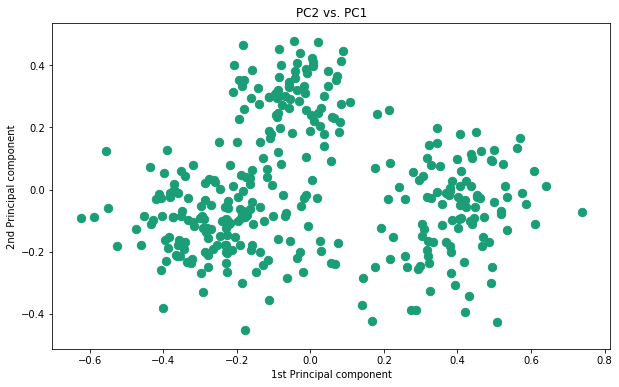

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(coef_PCA.iloc[:,0], coef_PCA.iloc[:,1], s = 70, zorder=0, c=dark2_colors[0])
# for i in range(coef_PCA.shape[0]):
#     plt.text(coef_PCA.iloc[i,0]+.1, coef_PCA.iloc[i,1], ecoli[i]['state'], zorder=1, size=12, color=shade_black) 
plt.ylabel('2nd Principal component' )
plt.xlabel('1st Principal component' )
plt.title('PC2 vs. PC1')
plt.show()

### Problem 2f (5 points)

All PCA plots require a qualification of the fraction of variance captured in the plot.  Compute this here.

In [ ]:
pca_ecoli.explained_variance_ratio_.cumsum()*100.

array([51.61680984, 76.03714978])

the above array tells me that the first vector explains about half the variance, the second another 25% which leads to a cumulative explanation of 76.03

## Problem 3  MDS vs. tSNE  (15 points)

### Problem 3a (5 points)

For the same data set, repeat 2e using sklearn's Multidimensional scaling algorithm. How does it compare?

In [ ]:
from sklearn.manifold import MDS
from sklearn.metrics import euclidean_distances

In [ ]:
ecoli.shape

(336, 7)

In [ ]:
ecoli_mds = MDS(n_components=2, random_state=99).fit_transform(ecoli)
ecoli_mds = pd.DataFrame(ecoli_mds)
ecoli_mds

,0,1
0,0.363147,-0.044610
1,0.246505,-0.412143
2,0.107012,0.001281
3,0.101875,0.089609
4,0.361504,-0.275179
...,...,...
331,-0.053151,0.325438
332,0.210938,0.208428
333,0.145046,0.140858
334,0.135667,0.137409


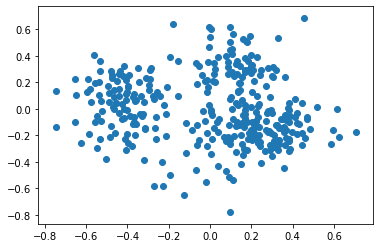

In [ ]:
plt.scatter(x=ecoli_mds[0],y=ecoli_mds[1])

we do get a slight grouping / clustering here.  You can make out around three clusters. 

### Problem 3b  t-SNE  (5 points)

Repeat 2e using a t-SNE plot with the default settings.

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
#using the default TSNE settings, EXCEPT random_state so that my results are reproducable. 
ecoli_tsne = TSNE(random_state=14).fit_transform(ecoli)

In [ ]:
ecoli_tsne=pd.DataFrame(ecoli_tsne)
ecoli_tsne

,0,1
0,13.403618,7.978974
1,14.361468,-3.986748
2,6.945486,9.211404
3,-0.247546,12.035241
4,16.587812,-1.988270
...,...,...
331,-2.791671,9.884847
332,-1.973071,13.917069
333,-1.141938,13.750688
334,-0.872766,13.995859


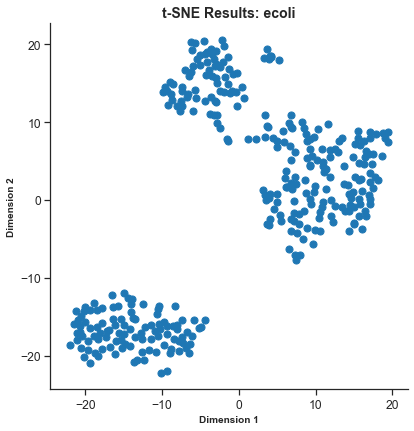

In [ ]:
ecoli_tsne.columns = ['_DIM_1_','_DIM_2_']
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

sns.lmplot(x='_DIM_1_',
           y='_DIM_2_',
           data=ecoli_tsne,
           fit_reg=False,
           legend=True,
           height=6,
           scatter_kws={"s":50, "alpha":1})

plt.title('t-SNE Results: ecoli', weight='bold').set_fontsize('14')
plt.xlabel('Dimension 1', weight='bold').set_fontsize('10')
plt.ylabel('Dimension 2', weight='bold').set_fontsize('10')

In [ ]:
This actually looks a bit cleaner than the MDS grouping - more distinct clustering around the three means.  

### Problem 3c t-SNE perplexity  (5 points)

Try out a few t-SNE plots for the same data set by varying the perplexity or other parameters.  State the best perplexity for separating the 8 different classes and describe your rationale in a sentence or two.  

perplexity is basically the tuning fork between the local vs global focus in this visualization method.  

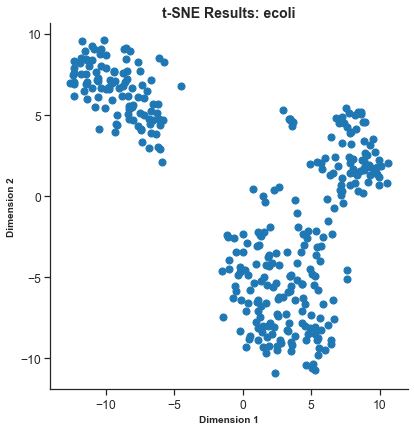

In [ ]:
ecoli_tsne = pd.DataFrame(TSNE(n_components=2,random_state=14,perplexity=55).fit_transform(ecoli))
ecoli_tsne

ecoli_tsne.columns = ['_DIM_1_','_DIM_2_']
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

sns.lmplot(x='_DIM_1_',
           y='_DIM_2_',
           data=ecoli_tsne,
           fit_reg=False,
           legend=True,
           height=6,
           scatter_kws={"s":50, "alpha":1})

plt.title('t-SNE Results: ecoli', weight='bold').set_fontsize('14')
plt.xlabel('Dimension 1', weight='bold').set_fontsize('10')
plt.ylabel('Dimension 2', weight='bold').set_fontsize('10')

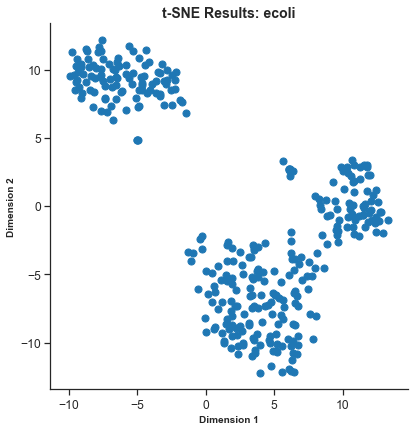

In [ ]:
ecoli_tsne = pd.DataFrame(TSNE(n_components=2,random_state=14,perplexity=55,learning_rate=500).fit_transform(ecoli))
ecoli_tsne

ecoli_tsne.columns = ['_DIM_1_','_DIM_2_']
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

sns.lmplot(x='_DIM_1_',
           y='_DIM_2_',
           data=ecoli_tsne,
           fit_reg=False,
           legend=True,
           height=6,
           scatter_kws={"s":50, "alpha":1})

plt.title('t-SNE Results: ecoli', weight='bold').set_fontsize('14')
plt.xlabel('Dimension 1', weight='bold').set_fontsize('10')
plt.ylabel('Dimension 2', weight='bold').set_fontsize('10')

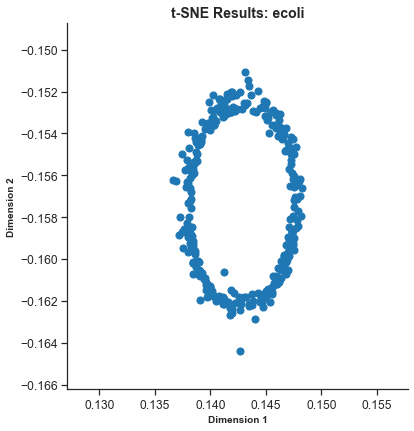

In [ ]:
ecoli_tsne = pd.DataFrame(TSNE(n_components=2,random_state=14,perplexity=500).fit_transform(ecoli))
ecoli_tsne

ecoli_tsne.columns = ['_DIM_1_','_DIM_2_']
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

sns.lmplot(x='_DIM_1_',
           y='_DIM_2_',
           data=ecoli_tsne,
           fit_reg=False,
           legend=True,
           height=6,
           scatter_kws={"s":50, "alpha":1})

plt.title('t-SNE Results: ecoli', weight='bold').set_fontsize('14')
plt.xlabel('Dimension 1', weight='bold').set_fontsize('10')
plt.ylabel('Dimension 2', weight='bold').set_fontsize('10')

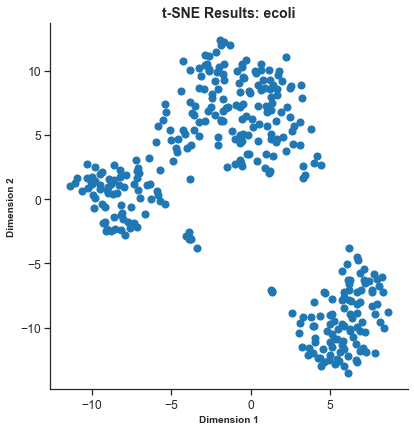

In [ ]:
ecoli_tsne = pd.DataFrame(TSNE(n_components=2,random_state=14,perplexity=55,learning_rate=55).fit_transform(ecoli))
ecoli_tsne

ecoli_tsne.columns = ['_DIM_1_','_DIM_2_']
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

sns.lmplot(x='_DIM_1_',
           y='_DIM_2_',
           data=ecoli_tsne,
           fit_reg=False,
           legend=True,
           height=6,
           scatter_kws={"s":50, "alpha":1})

plt.title('t-SNE Results: ecoli', weight='bold').set_fontsize('14')
plt.xlabel('Dimension 1', weight='bold').set_fontsize('10')
plt.ylabel('Dimension 2', weight='bold').set_fontsize('10')

## Problem 4 PCA vs. tSNE vs. UMAP (30 points)

This problem works with the NYT Covid data set available here: https://github.com/nytimes/covid-19-data/blob/master/us-counties.csv.  I've downloaded and pivoted a copy of the data called covid_cases_countY_by_date.txt, but you may want to go back to the original data.  

The pivoted file shows the number of new cases per day for each US county.  For this problem, we are asking you to characterize the shapes of the curves over time.  This means you will want to normalize by row before you start working with the data.  

### Problem 4a (5 points)

Devise a scheme for coloring the data in a sensible way as part of an exploratory analysis.  Essentially, you're creating a new column of data that won't be used in the creation of the x-y points, but will be used to color them.  You can use the raw data, clustering, add in a separate data set, or anything else.  If you're clustering, include the code here.  Otherwise you can just tell us your criteria that you will use to color the plots for the remainder.  

In [ ]:
covid_raw = pd.read_csv("covd-us-counties.csv")
covid_pivot = pd.read_csv('covid_cases_county_by_date.txt', sep='\t')
covid_pivot = covid_pivot.fillna(0)
covid_raw.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [ ]:
covid_pivot

,Country,21-Jan,22-Jan,23-Jan,24-Jan,25-Jan,26-Jan,27-Jan,28-Jan,29-Jan,...,25-Aug,26-Aug,27-Aug,28-Aug,29-Aug,30-Aug,31-Aug,1-Sep,2-Sep,Grand Total
0,Abbeville,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,388.0,393.0,394,404,406,415,418,434,439,21643
1,Acadia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2776.0,2775.0,2781,2799,2799,2808,2809,2817,2821,166284
2,Accomack,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1135.0,1136.0,1139,1141,1143,1143,1145,1148,1148,120550
3,Ada,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10779.0,10871.0,10944,11028,11080,11109,11176,11297,11374,558849
4,Adair,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,927.0,942.0,963,971,978,988,995,1020,1046,60164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1917,Yuma,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12148.0,12166.0,12205,12228,12276,12293,12293,12320,12328,790100
1918,Zapata,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,247.0,247.0,247,263,272,272,276,281,281,11049
1919,Zavala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,287.0,287.0,287,287,287,287,287,287,287,12950
1920,Ziebach,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,46.0,46.0,46,47,48,48,48,49,50,1332


I loaded both data sets, but first I thought I'd take a look at the raw data. Ignoring date for a moment, I thought about creating some kind of summarization variable. I summarized by state.  

In [ ]:
covid_state_tot = pd.DataFrame(covid_raw.groupby('state').mean())
covid_state_tot.head()

,fips,cases,deaths
state,,,
Alabama,1067.287340,729.111234,14.767938
Alaska,2145.495693,98.924361,0.710094
Arizona,4013.940580,5385.775943,128.814363
Arkansas,5075.331883,323.185872,4.128409
California,6058.338749,4725.010949,101.673714


It's interesting to see that the variance is not independent, that is it sems to increase as the scale of the two variables increase.  This likely does not have an impact on our dimension reduction questions, but good to note. There are some really bad states with bad mortality rates for the number of cases the have.  Guessing these are the early, hardest hit states like New York. 

I don't think this is the route I'm supposed to be taking, so I'd like to bring the conversation back to the pivoted data set.  I also want to add the States column back to the dataset. I'll do that by merging with the original dataset.  

This is interesting, but I decided to take a look at the pre-formmated data provided with the homework next. 

Let's take a look at the data

In [ ]:
covid_final=pd.merge(covid_pivot,covid_raw.iloc[:,1:3],left_on='Country',right_on='county') #note county is misspelled
covid_final=covid_final.iloc[:,1:]
covid_final_norm = pd.DataFrame(preprocessing.normalize(covid_final.iloc[:,0:-3]))

In [ ]:
covid_final_norm=pd.concat([covid_final_norm,covid_final.iloc[:,227:229]],axis=1)
covid_final_norm

,0,1,2,3,4,5,6,7,8,9,...,218,219,220,221,222,223,224,225,county,state
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.162283,0.162696,0.166825,0.167651,0.171368,0.172606,0.179213,0.181278,Abbeville,South Carolina
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.162283,0.162696,0.166825,0.167651,0.171368,0.172606,0.179213,0.181278,Abbeville,South Carolina
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.162283,0.162696,0.166825,0.167651,0.171368,0.172606,0.179213,0.181278,Abbeville,South Carolina
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.162283,0.162696,0.166825,0.167651,0.171368,0.172606,0.179213,0.181278,Abbeville,South Carolina
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.162283,0.162696,0.166825,0.167651,0.171368,0.172606,0.179213,0.181278,Abbeville,South Carolina
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537517,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.214574,0.214574,0.219239,0.223903,0.223903,0.223903,0.228568,0.233233,Ziebach,South Dakota
537518,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.214574,0.214574,0.219239,0.223903,0.223903,0.223903,0.228568,0.233233,Ziebach,South Dakota
537519,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.214574,0.214574,0.219239,0.223903,0.223903,0.223903,0.228568,0.233233,Ziebach,South Dakota
537520,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.214574,0.214574,0.219239,0.223903,0.223903,0.223903,0.228568,0.233233,Ziebach,South Dakota


In [ ]:
covid_kmeans = KMeans(n_clusters=30).fit(covid_final_norm.iloc[:,0:-2])
colors_covid_kmeans = covid_kmeans.predict(covid_final_norm.iloc[:,0:-2])

##### I set myself up for TWO options, one is to color by state or county, the other is to use the kmeans clustering for the coloring.  

### Problem 4b (5 points)

Create a PCA plot for this data.

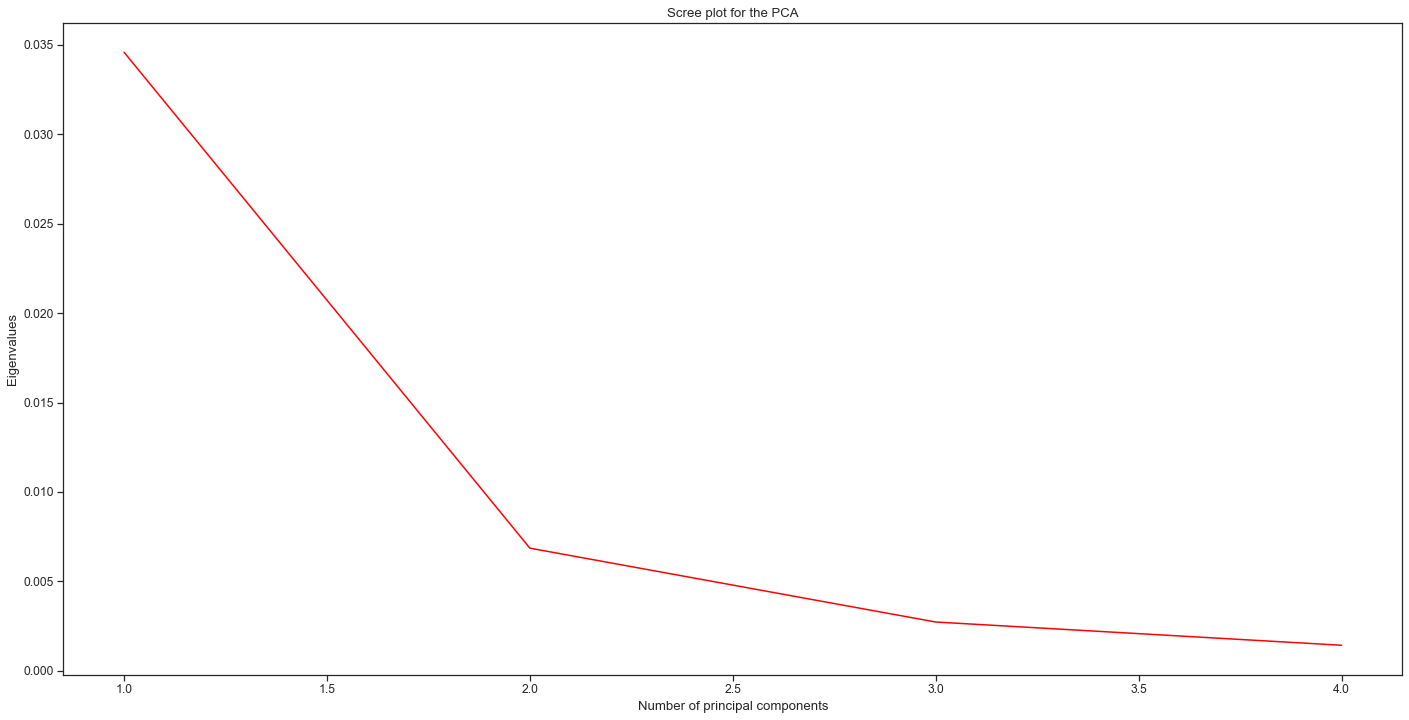

The 1st Principal Component explains 70.6 % of the variance

The 1st and 2nd Principal Components explain 84.7 % of the variance

The 1st, 2nd and 3rd Principal Components explain 90.2 % of the variance

The first four Principal Components explain 93.2 % of the variance



In [ ]:
pca_covid = sklearn.decomposition.PCA(n_components=4).fit(covid_final_norm.iloc[:,:-2])
coef_PCA_covid = pca_covid.transform(covid_final_norm.iloc[:,:-2]) #coef_PCA = projected Data/ PC scores

# we make a scree plot to see how many Principal Components to consider
plt.figure(figsize=(24, 12))
eig = pca_covid.explained_variance_
# and calculate the variance explained by the PC analysis
var_exp = pca_covid.explained_variance_ratio_.cumsum()*100.

plt.plot(np.arange(1,len(eig)+1), eig, color='r')
plt.title('Scree plot for the PCA')
plt.xlabel('Number of principal components')
plt.ylabel('Eigenvalues')
plt.show()

print ('The 1st Principal Component explains {:03.1f} % of the variance\n'.format(var_exp[0]))
print ('The 1st and 2nd Principal Components explain {:03.1f} % of the variance\n'.format(var_exp[1]))
print ('The 1st, 2nd and 3rd Principal Components explain {:03.1f} % of the variance\n'.format(var_exp[2]))
print ('The first four Principal Components explain {:03.1f} % of the variance\n'.format(var_exp[3]))

based on the above it looks like 2 Principal components is the magic number, I'll go ahead and compute PCA with n_components = 2. 

In [ ]:
pca_covid = sklearn.decomposition.PCA(n_components=2).fit(covid_final_norm.iloc[:,:-2])
coef_PCA = pca_covid.transform(covid_final_norm.iloc[:,:-2])

In [ ]:
plt.figure(figsize=(30,18))
plt.scatter(coef_PCA[:,0], coef_PCA[:,1], s = 70, zorder=0, c=colors_covid_kmeans)
for i in range(coef_PCA.shape[0]):
    plt.text(coef_PCA[i,0]+.1,coef_PCA[i,1], covid_final_norm.iloc[i]['state'],  zorder=1, size=12, color=shade_black)  
plt.ylabel('2nd Principal component' )
plt.xlabel('1st Principal component' )
plt.title('PC2 vs. PC1')
plt.show()

### Problem 4c (5 points)

Tune the t-SNE plot for this data set and display the results.

In [ ]:
tsne = TSNE(n_components=2, random_state=0, perplexity=43, n_iter=250, learning_rate=100 )
covid_tsne = tsne.fit_transform(covid_final_norm.iloc[:,:-1])

In [ ]:
X_tsne_df = pd.DataFrame(covid_tsne)
X_tsne_df.columns = ['_DIM_1_','_DIM_2_']
X_tsne_df['Label'] = covid_final_norm.loc[:,'state']

In [ ]:
#https://towardsdatascience.com/an-introduction-to-t-sne-with-python-example-5a3a293108d1
# Plot Digits t-SNE
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

sns.lmplot(x='_DIM_1_',
           y='_DIM_2_',
           data=X_tsne_df,
           fit_reg=False,
           legend=True,
           height=12,
           hue='Label')
#            scatter_kws={"s":50, "alpha":1})

plt.title('t-SNE Results: covid', weight='bold').set_fontsize('14')
plt.xlabel('Dimension 1', weight='bold').set_fontsize('10')
plt.ylabel('Dimension 2', weight='bold').set_fontsize('10')

In [ ]:
tsne = TSNE(n_components=2, random_state=0, perplexity=100, n_iter=250, learning_rate=100 )
covid_tsne = tsne.fit_transform(covid_final_norm.iloc[:,:-1])

X_tsne_df = pd.DataFrame(covid_tsne)
X_tsne_df.columns = ['_DIM_1_','_DIM_2_']
X_tsne_df['Label'] = covid_final_norm.loc[:,'state']

#https://towardsdatascience.com/an-introduction-to-t-sne-with-python-example-5a3a293108d1
# Plot Digits t-SNE
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

sns.lmplot(x='_DIM_1_',
           y='_DIM_2_',
           data=X_tsne_df,
           fit_reg=False,
           legend=True,
           height=12,
           hue='Label')
#            scatter_kws={"s":50, "alpha":1})

plt.title('t-SNE Results: covid', weight='bold').set_fontsize('14')
plt.xlabel('Dimension 1', weight='bold').set_fontsize('10')
plt.ylabel('Dimension 2', weight='bold').set_fontsize('10')

In [ ]:
tsne = TSNE(n_components=2, random_state=0, perplexity=1200, n_iter=250, learning_rate=100 )
covid_tsne = tsne.fit_transform(covid_final_norm.iloc[:,:-1])

X_tsne_df = pd.DataFrame(covid_tsne)
X_tsne_df.columns = ['_DIM_1_','_DIM_2_']
X_tsne_df['Label'] = covid_final_norm.loc[:,'state']

#https://towardsdatascience.com/an-introduction-to-t-sne-with-python-example-5a3a293108d1
# Plot Digits t-SNE
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

sns.lmplot(x='_DIM_1_',
           y='_DIM_2_',
           data=X_tsne_df,
           fit_reg=False,
           legend=True,
           height=12,
           hue='Label')
#            scatter_kws={"s":50, "alpha":1})

plt.title('t-SNE Results: covid', weight='bold').set_fontsize('14')
plt.xlabel('Dimension 1', weight='bold').set_fontsize('10')
plt.ylabel('Dimension 2', weight='bold').set_fontsize('10')

### Problem 4d (5 points)

Show the default UMAP visualization of this data.

In [ ]:
covid_final_norm.iloc[:,:-1]

In [ ]:
sns.set(style='white', context='poster')
cmap = LinearSegmentedColormap.from_list('mycmap', ['red', 'green', 'blue', 'black', 'yellow', 'pink', 'brown', 'aquamarine', 'mediumpurple' ,'orange'])
embedding = umap.UMAP(n_neighbors=2).fit_transform(covid_final_norm.iloc[:,:-1])



In [ ]:
fig, ax = plt.subplots(1, figsize=(14, 10))
plt.scatter(*embedding.T, s=0.3, c=target, cmap=cmap, alpha=1.0)
plt.setp(ax, xticks=[], yticks=[])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.setp(ax.spines.values(), color='grey')

cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
cbar.set_ticks(np.arange(10))
cbar.set_ticklabels(classes)
plt.title('COVID dim-reduction via UMAP');

### Problem 4e (5 points)

Tune the UMAP visualization for this data set.

### Problem 4f (5 points)

Which approach gives you the best results given your criteria in 4a?

## Problem 5 (10 points)

### Problem 5a  How many hours did this homework take? (5 points)  

This will not affect your grade (unless you don't answer it).  We will be monitoring time spent on homework to be sure that we are not over-burdening students.

##### 30 hours - I had to re-orient myself with a lot of stuff (e.g. my python skills were rusty as my last few classes were in R)

### Problem 5b  Last step (5 points)

Save this notebook as LastnameFirstnameHW1.ipynb such as MuskElonHW1.ipynb.   Create a pdf of this notebook named similarly.  Submit both the python notebook and the pdf version to the Canvas dropbox.  We require both versions.